#Grupo: Cristian Filho, Julio Freire e Vinicius Paiva

In [ ]:
!pip install osmnx

In [69]:
import osmnx as ox
import pandas as pd
import networkx as nx
import heapq

In [132]:
def get_higher_betweenness_centrality(graph):
  bc = nx.betweenness_centrality(ox.get_digraph(graph), weight="length") #Identifica o ponto com maior Betweenness centrality
  max_node, max_bc = max(bc.items(), key=lambda x: x[1])
  return max_node, max_bc

def plot_node(graph, max_node):
  nc = ["r" if node == max_node else "w" for node in graph.nodes]
  ns = [80 if node == max_node else 15 for node in graph.nodes]
  fig, ax = ox.plot_graph(graph, node_size=ns, node_color=nc, node_zorder=2)

def get_street_name(graph, node_id):
  """
  Returns the names of all streets that pass through a node (point)
  """
  street_name = ''
  for a,b,c in graph.edges(data=True):
    if a == node_id:
      return c['name']

def get_longest_streets(num_streets, graph):
  streets = []
  for a, b, c in graph.edges(data = True):
    if 'length' in c and 'name' in c:
      temp_dict = {
          'name': c['name'],
          'length': c['length']
      }
      streets.append(temp_dict)
  return heapq.nlargest(num_streets, streets, key=lambda x: x['length'])

def get_graph_statistics(place_name):
  graph = ox.graph_from_place(place_name, network_type='drive')
  gdf = ox.geocode_to_gdf(place_name)
  areaSP = ox.project_gdf(gdf).unary_union.area
  stats = ox.basic_stats(graph, area=areaSP)
  return pd.Series(stats)

def plot_betweness_graph(graph):
  bc = nx.betweenness_centrality(ox.get_digraph(graph), weight="length")
  nx.set_node_attributes(graph, bc, "bc")
  nc = ox.plot.get_node_colors_by_attr(graph, "bc", cmap="plasma")
  fig, ax = ox.plot_graph(
      graph,
      node_color=nc,
      node_size=30,
      node_zorder=2,
      edge_linewidth=0.2,
      edge_color="w",
  )

def count_streets(graph):
  streets_name = []
  for a,b,c in graph.edges(data = True):
    if 'name' in c and c['name'] not in streets_name:
      streets_name.append(c['name'])
  return len(streets_name)

def avg_streets_length(graph, statistics):
  num_streets = count_streets(graph)
  return statistics['street_length_total']/num_streets

def num_nodes_edges(graph):
  nodes = len(graph.nodes())
  edges = len(graph.edges())
  print(f'Total of Nodes:{nodes}\nTotal of Edges: {edges}')

In [54]:
place_1 = 'Capim Macio, Natal, Brazil'
place_2 = 'Pajuçara, Natal, Brazil'
place_3 = 'Lagoa Nova, Natal, Brazil'

# First neighborhood - Capim Macio

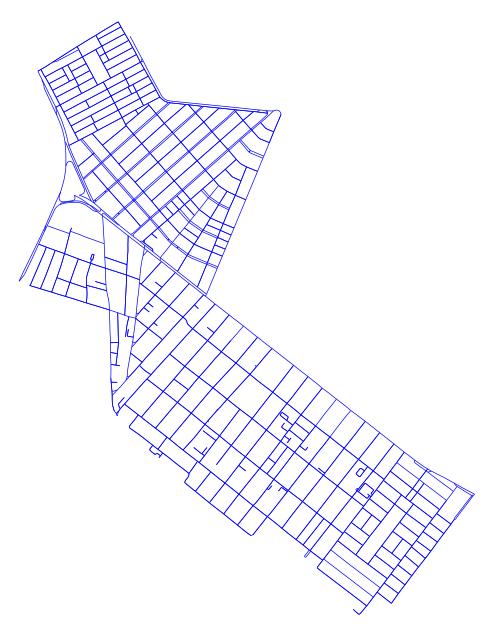

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [55]:
#Plotting the local map
graph_1 = ox.graph_from_place(place_1, network_type='drive')
ox.plot_graph(graph_1, node_size=0, edge_color='b', edge_linewidth=0.5, bgcolor='w')

In [67]:
#Quantity of nodes and edges and density of network
num_nodes_edges(graph_1)
print(f'Density of network: {nx.density(nx.Graph(graph_1))}')

Total of Nodes:668
Total of Edges: 1714
Density of network: 0.004596504143138012


In [95]:
# AVG length of streets
statistics = get_graph_statistics(place_1)
avg_length = avg_streets_length(graph_1, statistics)
print(f'The AVG length of the streets (meters): {avg_length}')

The AVG length of the streets (meters): 595.0632013422821


In [72]:
# The N longest streets
N = 5
get_longest_streets(N, graph_1)

[{'name': ['Rua Abaeté', 'Rua José Mauro de Vasconcelos'], 'length': 458.775},
 {'name': ['Rua Abaeté', 'Rua José Mauro de Vasconcelos'], 'length': 458.775},
 {'name': 'Rua Maria Nazaré de Araújo', 'length': 400.934},
 {'name': 'Rua Vicente Egberto Cavalcante', 'length': 400.65200000000004},
 {'name': 'Avenida Senador Salgado Filho', 'length': 396.962}]

In [133]:
#The most important street (more connections)
node_id, bc = get_higher_betweenness_centrality(graph_1)
name = get_street_name(graph_1, node_id)
print(f"Name of Street: {name}\nBetweennes centrality: {bc}")

Name of Street: Rua Pastor Gabno Brelaz
Betweennes centrality: 0.3056624840732787


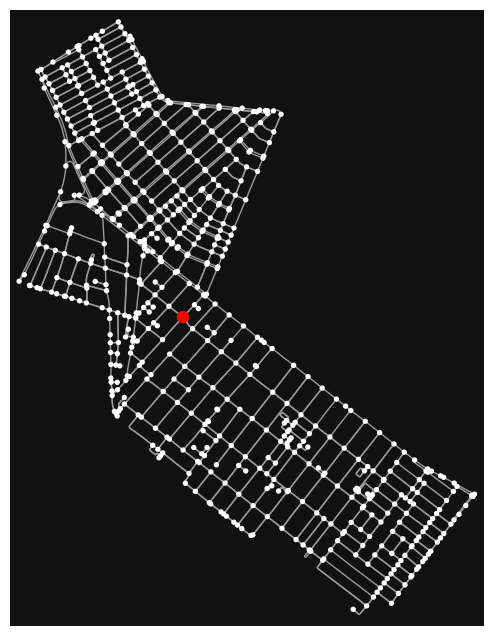

In [113]:
#Plotting the node with highest betweeness_centrality
plot_node(graph_1, node_id)

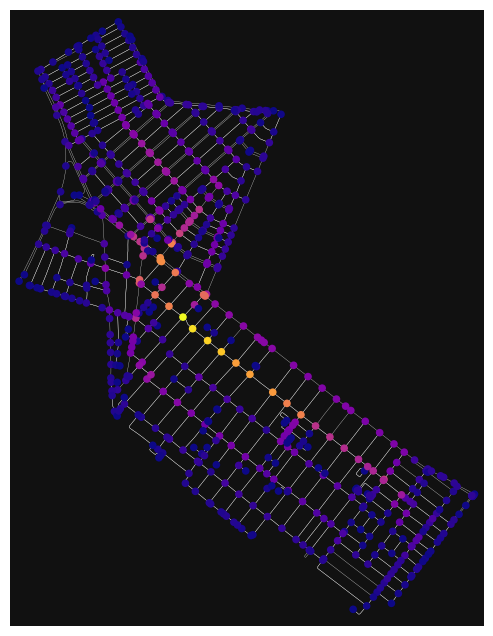

In [84]:
#Plotting the betweeness graph
plot_betweness_graph(graph_1)

#Second Neighborhood - Pajuçara

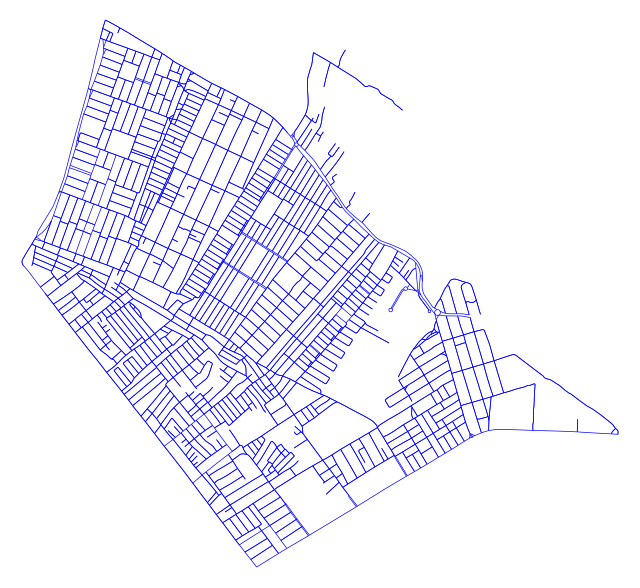

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [56]:
#Plotting the local map
graph_2 = ox.graph_from_place(place_2, network_type='drive')
ox.plot_graph(graph_2, node_size=0, edge_color='b', edge_linewidth=0.5, bgcolor='w')

In [96]:
#Quantity of nodes and edges and density of network
num_nodes_edges(graph_2)
print(f'Density of network: {nx.density(nx.Graph(graph_2))}')

Total of Nodes:1475
Total of Edges: 4110
Density of network: 0.002020099809120806


In [97]:
# AVG length of streets
statistics = get_graph_statistics(place_2)
avg_length = avg_streets_length(graph_2, statistics)
print(f'The AVG length of the streets (meters): {avg_length}')

The AVG length of the streets (meters): 294.38483148148106


In [98]:
# The N longest streets
N = 5
get_longest_streets(N, graph_2)

[{'name': ['Rua Trovador Mariano Coelho', 'Rua Rio Doce'],
  'length': 995.5860000000001},
 {'name': ['Rua Trovador Mariano Coelho', 'Rua Rio Doce'],
  'length': 995.5859999999999},
 {'name': 'Avenida Moema Tinoco da Cunha Lima', 'length': 607.955},
 {'name': 'Rua Trovador Mario Siqueira', 'length': 534.688},
 {'name': 'Rua Trovador Mario Siqueira', 'length': 534.6879999999999}]

In [116]:
#The most important street (more connections)
node_id, bc = get_higher_betweenness_centrality(graph_2)
name = get_street_name(graph_2, node_id)
print(f"Name of Street: {name}\nBetweennes centrality: {bc}")

Name of Street: Avenida Mar do Leste
Betweennes centrality: 0.1473529409055445


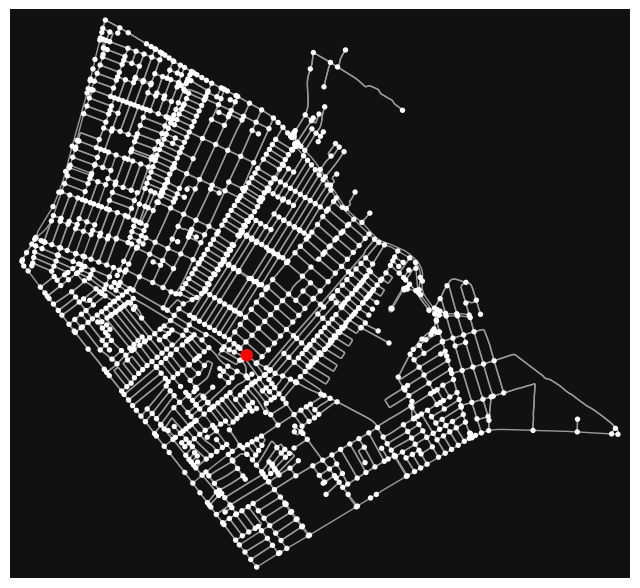

In [117]:
#Plotting the node with highest betweeness_centrality
plot_node(graph_2, node_id)

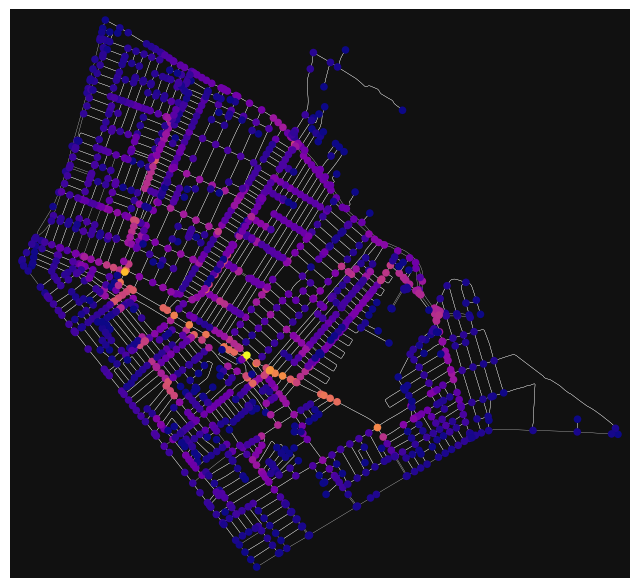

In [100]:
#Plotting the betweeness graph
plot_betweness_graph(graph_2)

#Third Neighborhood - Lagoa Nova

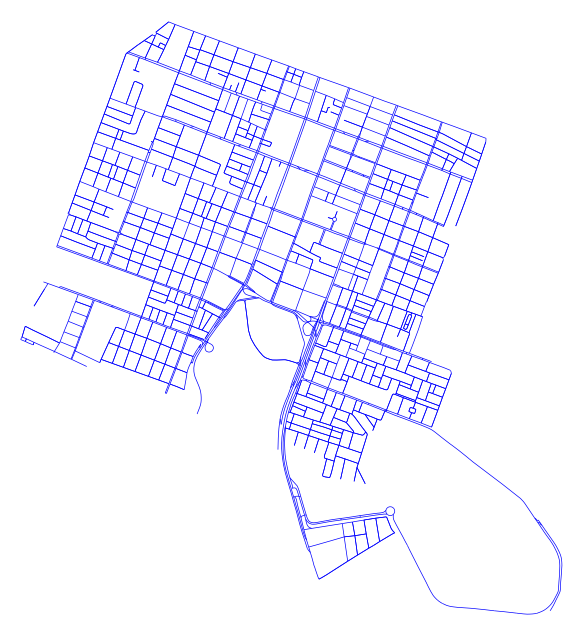

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [57]:
#Plotting the local map
graph_3 = ox.graph_from_place(place_3, network_type='drive')
ox.plot_graph(graph_3, node_size=0, edge_color='b', edge_linewidth=0.5, bgcolor='w')

In [101]:
#Quantity of nodes and edges and density of network
num_nodes_edges(graph_3)
print(f'Density of network: {nx.density(nx.Graph(graph_3))}')

Total of Nodes:1187
Total of Edges: 2757
Density of network: 0.0026367718865562993


In [102]:
# AVG length of streets
statistics = get_graph_statistics(place_3)
avg_length = avg_streets_length(graph_3, statistics)
print(f'The AVG length of the streets (meters): {avg_length}')

The AVG length of the streets (meters): 452.70430555555595


In [103]:
# The N longest streets
N = 5
get_longest_streets(N, graph_3)

[{'name': 'Avenida Senador Salgado Filho', 'length': 1124.977},
 {'name': 'Avenida Senador Salgado Filho', 'length': 785.9249999999998},
 {'name': 'Avenida Jerônimo Câmara', 'length': 701.374},
 {'name': 'Anel Viário da UFRN', 'length': 661.4459999999999},
 {'name': ['Anel Viário da UFRN', 'Avenida Capitão Mor-Gouveia'],
  'length': 658.3480000000001}]

In [118]:
#The most important street (more connections)
node_id, bc = get_higher_betweenness_centrality(graph_3)
name = get_street_name(graph_3, node_id)
print(f"Name of Street: {name}\nBetweennes centrality: {bc}")

Name of Street: Avenida Amintas Barros
Betweennes centrality: 0.16351100390633339


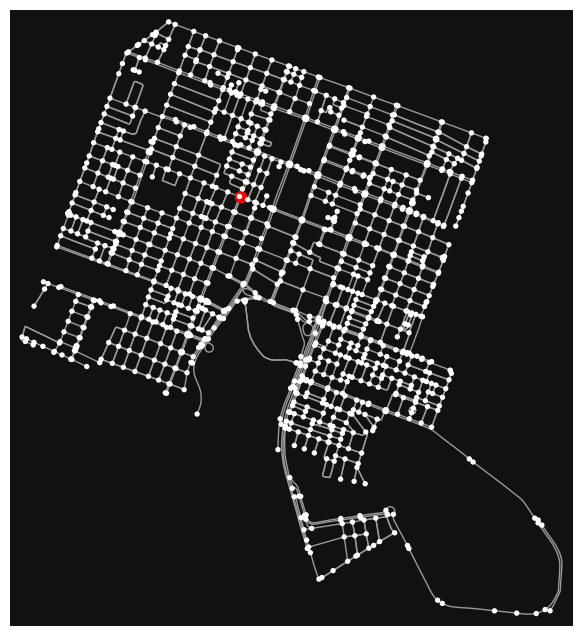

In [119]:
#Plotting the node with highest betweeness_centrality
plot_node(graph_3, node_id)

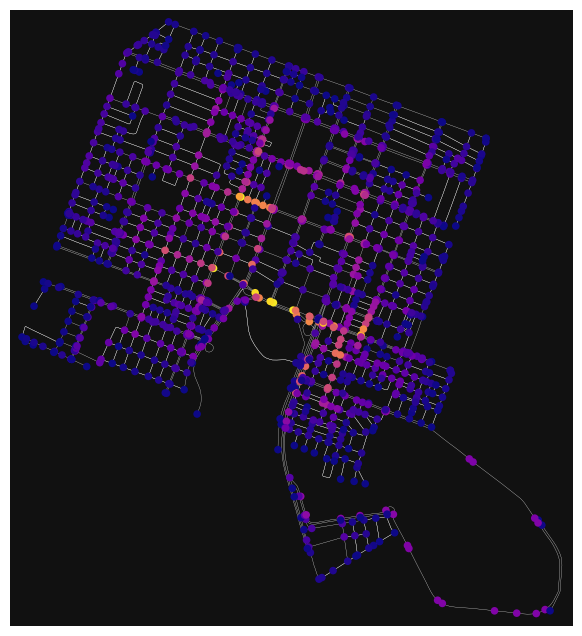

In [105]:
#Plotting the betweeness graph
plot_betweness_graph(graph_3)